- 순환 신경망(Recurrent Neural Network, RNN)

> 앞의 입력 값에 대한 결과과 뒤의 입력 값에 영향을 준다.


- LSTM(Long Short Term Memory)

> RNN의 특성상 일반 신경망보다 기울기 소실 문제가 더 많이 발생하는 것을 보완한 방법. 즉, 반복되기 직전에 다음 층으로 기억된 값을 넘길지 여부를 관리하는 단계를 추가하는 것.



# LSTM을 이용해 로이터 뉴스 카테고리 분석하기

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.callbacks import EarlyStopping
#아래 maxlen에서 sequence.pad_sequences를 쓰려면 tensorflow.을 붙여서 해야된다.
from tensorflow.keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.datasets import reuters

import matplotlib.pyplot as plt
import numpy as np

In [27]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)  # num_words=1000: 빈도가 높은 단어만 사용(빈도가 1~1000에 해당하는 단어만 선택)

# 데이터 확인
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [28]:
# 단어의 수를 맞춰줘야 한다.(maxlen=100:단어의 수를 100개로 맞춤)
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [31]:
model= Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 43s 90ms/step - loss: 2.2007 - accuracy: 0.4382 - val_loss: 1.9335 - val_accuracy: 0.5009
Epoch 2/200
450/450 [==============================] - 40s 88ms/step - loss: 1.7628 - accuracy: 0.5446 - val_loss: 1.7042 - val_accuracy: 0.5641
Epoch 3/200
450/450 [==============================] - 41s 91ms/step - loss: 1.6196 - accuracy: 0.5887 - val_loss: 1.6269 - val_accuracy: 0.5899
Epoch 4/200
450/450 [==============================] - 39s 88ms/step - loss: 1.4503 - accuracy: 0.6299 - val_loss: 1.4305 - val_accuracy: 0.6443
Epoch 5/200
450/450 [==============================] - 40s 89ms/step - loss: 1.2974 - accuracy: 0.6669 - val_loss: 1.3265 - val_accuracy: 0.6638
Epoch 6/200
450/450 [==============================] - 41s 91ms/step - loss: 1.1512 - accuracy: 0.7096 - val_loss: 1.2876 - val_accuracy: 0.6799
Epoch 7/200
450/450 [==============================] - 40s 89ms/step - loss: 1.0501 - accuracy: 0.7365 - val_loss: 1.1879 - val_ac

In [33]:
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 2s 28ms/step - loss: 1.2067 - accuracy: 0.7360

 Test Accuracy: 0.7360


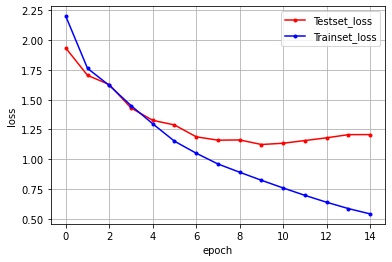

In [34]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()